In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>

In [6]:
test = pd.read_csv('test.csv', index_col=0)
train = pd.read_csv('train.csv', index_col=0)
sample = pd.read_csv('sample_submission.csv', index_col=0)
train.columns

Index(['Gender', 'Senior', 'Married', 'Dependents', 'Tenure', 'Phone',
       'MultiplePhones', 'Internet', 'Security', 'Backup', 'Insurance',
       'Support', 'TV', 'Movies', 'Contract', 'EBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
train.head(10)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False
5,Female,0,Yes,Yes,3,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,80.00,241.3,False
6,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),73.00,5163,False
7,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.65,74.9,True
8,Female,1,Yes,No,19,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.95,1760.25,False


In [12]:
def dataPrepare(data):
    data =data.drop('Phone', axis=1)
    data['TotalCharges'] =data['TotalCharges'].replace(regex=r'^(\D+)$', value=0).astype(float)
    object_data = data.select_dtypes(exclude=np.number)
    data = pd.concat([data.drop(object_data, axis=1), 
                             pd.get_dummies(object_data)
                            ], axis = 1)
    return data

In [14]:
train = pd.read_csv('train.csv', index_col=0)
object_data = train.select_dtypes(exclude=np.number)
num = train.select_dtypes(include=np.number)
data = train.pipe(dataPrepare)
numeric_data = data.select_dtypes(include=np.number)
X_train, X_test, Y_train, Y_test = train_test_split(numeric_data, 
                                                    data.Churn,
                                                    test_size = 0.3,
                                                    random_state = 10)
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

              precision    recall  f1-score   support

       False       0.83      0.89      0.86       783
        True       0.63      0.50      0.56       295

    accuracy                           0.78      1078
   macro avg       0.73      0.70      0.71      1078
weighted avg       0.77      0.78      0.78      1078



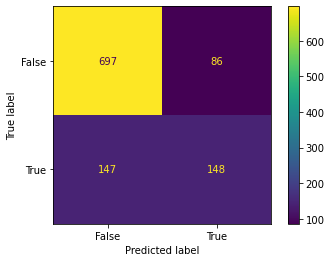

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=3)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
plot_confusion_matrix(estimator = model, X= X_test, y_true=Y_test)

              precision    recall  f1-score   support

       False       0.83      0.89      0.86       783
        True       0.64      0.53      0.58       295

    accuracy                           0.79      1078
   macro avg       0.74      0.71      0.72      1078
weighted avg       0.78      0.79      0.78      1078



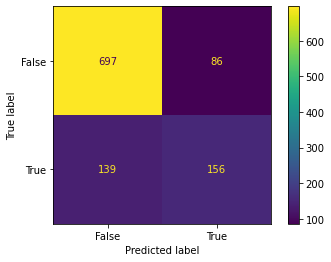

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
lr = LogisticRegression().fit(X_train, Y_train)
lr_test_predictions = lr.predict (X_test)
print(classification_report(Y_test, lr_test_predictions))
plot_confusion_matrix(estimator = lr, X= X_test, y_true=Y_test)

In [27]:
model = RandomForestRegressor(random_state = 10, n_estimators = 50, max_depth=20)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')
pd.DataFrame(model.feature_importances_, numeric_data.columns, columns=['Importance']).sort_values('Importance')

RMSE = 0.394


,Importance
Insurance_No internet service,3.282e-05
Support_No internet service,6.226e-05
Backup_No internet service,7.462e-05
Internet_No,9.175e-05
TV_No internet service,1.146e-04
Movies_No internet service,1.271e-04
Security_No internet service,6.845e-04
Security_Yes,4.113e-03
MultiplePhones_No phone service,4.203e-03
Support_Yes,5.234e-03


In [87]:
train2 = data
train2['div'] = train2['TotalCharges']/train2['MonthlyCharges']
train2['diff'] = train2['div']-train2['Tenure']
train2.sort_values(by='diff', ascending=False)[{'div','Tenure','diff','Churn'}][(train2.Churn==True)]

,div,Churn,diff,Tenure
Index,,,,
2147,33.377,True,3.377,30
2274,72.891,True,2.891,70
554,68.564,True,2.564,66
1174,45.505,True,2.505,43
1301,44.441,True,2.441,42
...,...,...,...,...
2133,52.769,True,-3.231,56
2216,53.726,True,-3.274,57
2016,52.608,True,-3.392,56


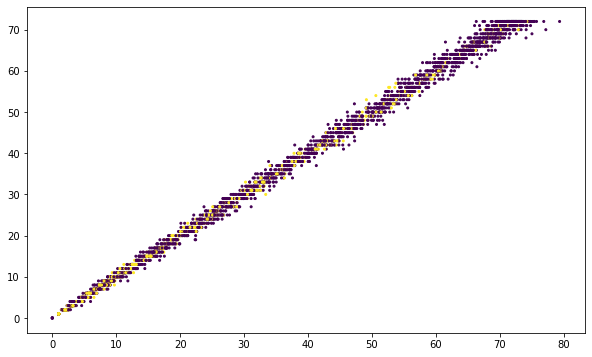

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(train2['div'], train2['Tenure'], c = train2.Churn, s=4)

<AxesSubplot:>

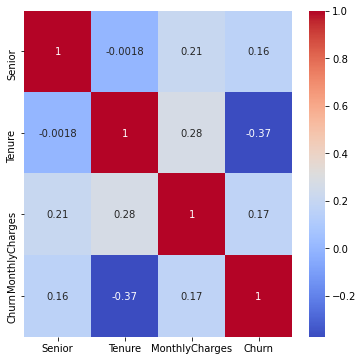

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(data[num.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

In [120]:
data.groupby(['Churn','Insurance', 'Backup']).Gender.count()

Churn  Insurance  Backup
False  -1         -1        714
        0          0        548
                   1        423
        1          0        421
                   1        533
True   -1         -1         65
        0          0        471
                   1        155
        1          0        151
                   1        110
Name: Gender, dtype: int64

In [395]:
data.groupby(['Churn']).Gender.count()

Churn
False    2639
True      952
Name: Gender, dtype: int64

In [132]:
data.groupby(['MultiplePhones','Internet', 'Churn']).Gender.count()

MultiplePhones  Internet  Churn
-1               0        False    269
                          True      88
 0              -1        False    545
                          True      59
                 0        False    433
                          True     106
                 1        False    311
                          True     281
 1              -1        False    169
                          True       6
                 0        False    315
                          True      36
                 1        False    597
                          True     376
Name: Gender, dtype: int64

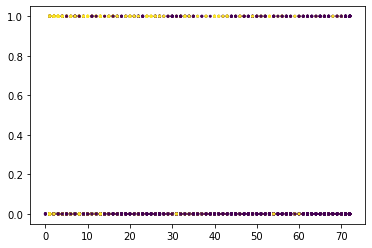

In [100]:
plt.scatter(data.Tenure, data.Senior, c = data.Churn, s=4)

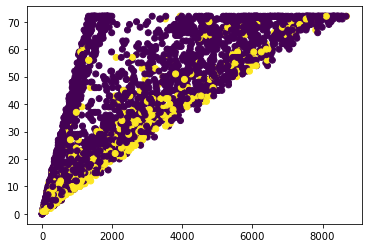

In [74]:
plt.scatter(data.TotalCharges,data.Tenure, c = target)

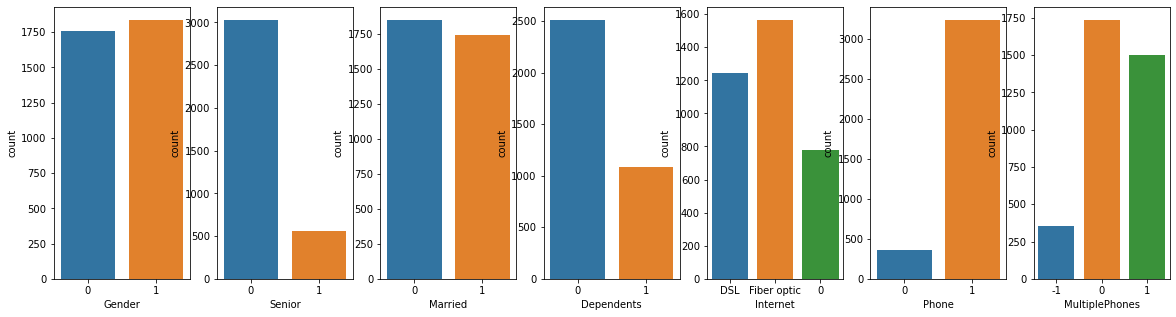

In [64]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))
sns.countplot(x='Gender', data=data, ax=axes[0]);
sns.countplot(x='Senior', data=data, ax=axes[1]);
sns.countplot(x='Married', data=data, ax=axes[2]);
sns.countplot(x='Dependents', data=data, ax=axes[3]);
sns.countplot(x='Internet', data=data, ax=axes[4]);
sns.countplot(x='Phone', data=data, ax=axes[5]);
sns.countplot(x='MultiplePhones', data=data, ax=axes[6]);

array([[<AxesSubplot:ylabel='Density'>]], dtype=object)

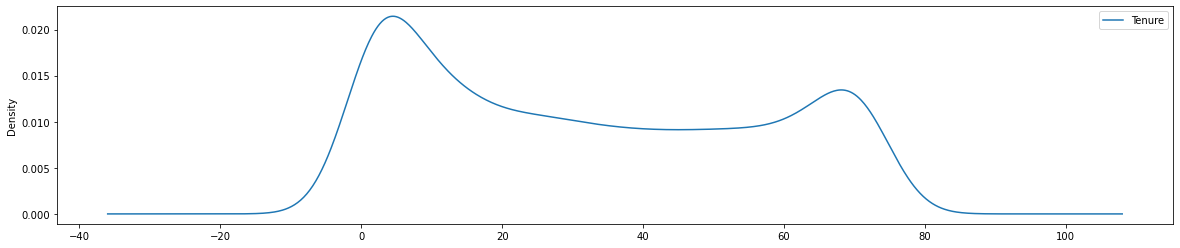

In [67]:
data[['Tenure']].plot(kind='density', layout=(1, 1), subplots=True,
                                 figsize=(20, 4), sharex=False)

In [143]:
data['TotalCharges'].describe()

count    3591.000
mean       64.488
std        30.057
min        18.400
25%        35.400
50%        70.300
75%        89.450
max       118.750
Name: MonthlyCharges, dtype: float64

array([[<AxesSubplot:ylabel='Density'>]], dtype=object)

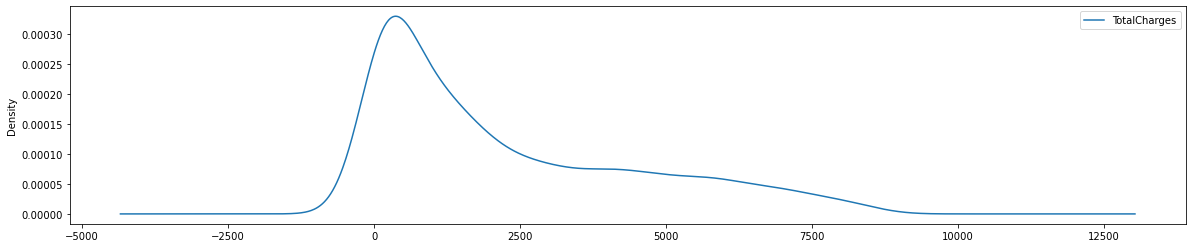

In [136]:
data[['TotalCharges']].plot(kind='density', layout=(1, 1), subplots=True,
                                 figsize=(20, 4), sharex=False)

array([[<AxesSubplot:ylabel='Density'>]], dtype=object)

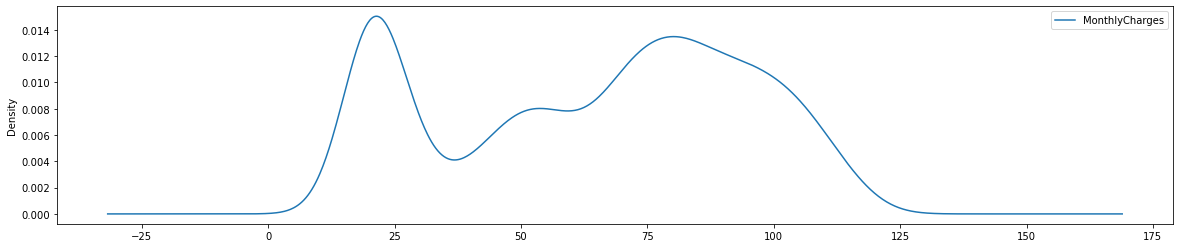

In [137]:
data[['MonthlyCharges']].plot(kind='density', layout=(1, 1), subplots=True,
                                 figsize=(20, 4), sharex=False)

In [ ]:
test = pd.read_csv('test.csv', index_col=0)
train = pd.read_csv('train.csv', index_col=0)

train = train.pipe(dataPrepare)
numeric_data = train.select_dtypes(include=np.number)
test = test.pipe(dataPrepare)[numeric_data.columns]

std_scaler = StandardScaler()
train[numeric_data.columns] = std_scaler.fit_transform(train[numeric_data.columns])
test = std_scaler.transform(test)

model = LogisticRegression() #RandomForestClassifier(n_estimators=200, max_depth=10, random_state=2)
model.fit(train[numeric_data.columns], train.Churn)

predictions = model.predict(test)
sample = pd.read_csv('sample_submission.csv', index_col=0)
sample['Churn'] = predictions
sample.to_csv('predict10.csv', index=True)